In [1]:
import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

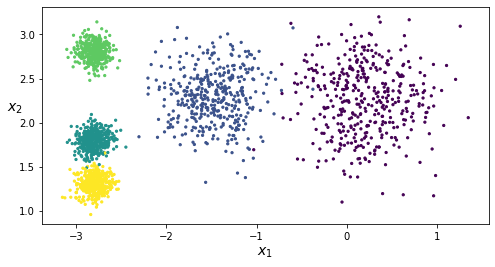

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X, y)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [9]:
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [10]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [11]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [12]:
y_pred is kmeans.labels_

False

In [13]:
(y_pred == kmeans.labels_).sum()

2000

In [14]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [15]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

In [16]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [17]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), # for drowing line
                linewidths=0.5, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

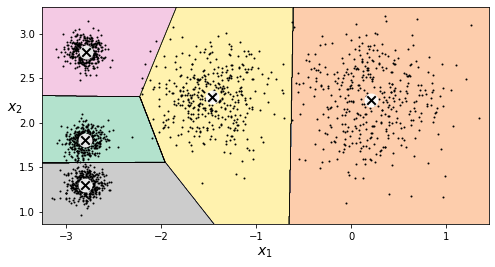

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [20]:
np.argmin(kmeans.transform(X_new), axis = 1)

array([1, 1, 2, 2], dtype=int64)

In [21]:
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [22]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

In [23]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [24]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [25]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [26]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter5 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=5, random_state=0)
kmeans_iter10 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=10, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter5.fit(X)
kmeans_iter10.fit(X)

KMeans(algorithm='full', init='random', max_iter=10, n_clusters=5, n_init=1,
       random_state=0)

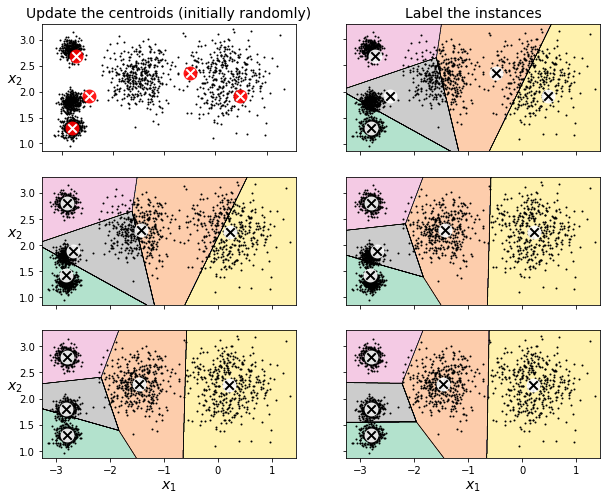

In [27]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter5.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter5, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter5, X, show_centroids=False)
plot_centroids(kmeans_iter10.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter10, X, show_ylabels=False)

plt.show()

In [28]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

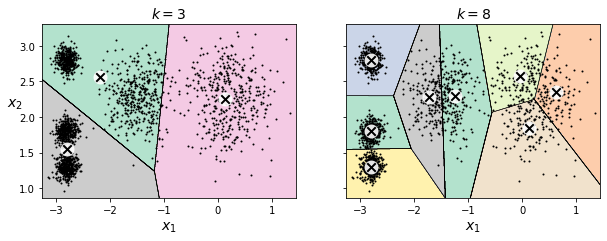

In [29]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

# How to chose K?

In [30]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [31]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.5985372581688

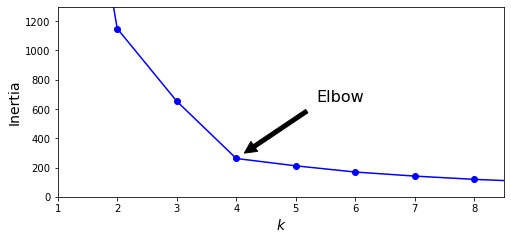

In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

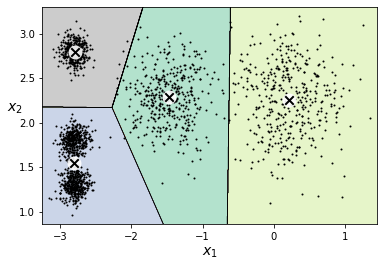

In [33]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [40]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6068660656395705,
 0.5600381725018386,
 0.5668839323465226]

In [36]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

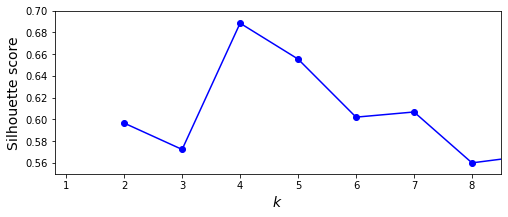

In [43]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0.8, 8.5, 0.55, 0.7])
plt.show()

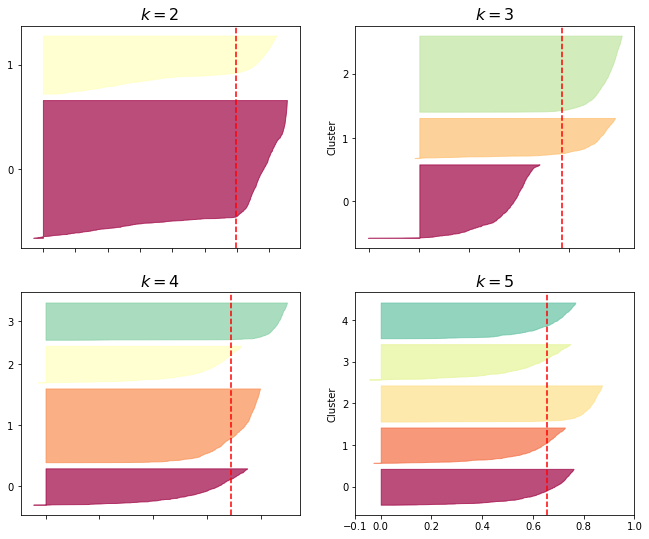

In [41]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k, n in zip((2, 3, 4, 5),(1,2,3,4)):
    plt.subplot(2, 2, n)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

#Real dataset

In [ ]:
from sklearn.datasets import load_iris

data = load_iris(as_frame = True)

In [ ]:
data = data.frame

In [ ]:
 data_target = data['target']
 data_feature = data.drop(['target'], axis=1)

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(data_feature)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=20).fit_transform(data_feature)

In [ ]:
plot_clusters(X_embedded,y_pred)

In [ ]:
plot_clusters(X_embedded,data_target)

# Limitation of distance-based model

In [ ]:
from sklearn.datasets import make_moons
sample, label = make_moons(n_samples=1000, noise=0.05)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(sample)

In [ ]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r',  s=10)
plt.scatter(sample[:, 0], sample[:, 1], c=kmeans.labels_, s=1)

#DBSCAN (density-based model)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.18, min_samples=2).fit(sample)

In [ ]:
plt.scatter(sample[:, 0], sample[:, 1], c=dbscan.labels_, s=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Wine 데이터셋을 DataFrame 형식으로 로드합니다.
dataset = load_wine(as_frame=True)
df = dataset.frame

# "alcohol"과 "total_phenols" 특성을 선택합니다.
data = df[["alcohol", "total_phenols"]]

# 데이터를 표준화합니다.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-means 클러스터링을 수행합니다. 여기서는 3개의 클러스터를 가정합니다.
kmeans = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans.fit_predict(data_scaled)

# 클러스터링 결과를 시각화합니다.
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=wine_clusters, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.xlabel('Alcohol (Standardized)')
plt.ylabel('Total Phenols (Standardized)')
plt.title('K-means Clustering of Wine Dataset')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

# Wine 데이터셋을 DataFrame 형식으로 로드합니다.
dataset = load_wine(as_frame=True)
df = dataset.frame

# "alcohol"과 "total_phenols" 특성을 선택합니다.
data = df[["alcohol", "total_phenols"]]

# K-means 클러스터링을 수행합니다. 여기서는 3개의 클러스터를 가정합니다.
kmeans = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans.fit_predict(data)

# 클러스터링 결과를 시각화합니다.
plt.scatter(data["alcohol"], data["total_phenols"], c=wine_clusters, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.xlabel('Alcohol')
plt.ylabel('Total Phenols')
plt.title('K-means Clustering of Wine Dataset (Without Standardization)')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Wine 데이터셋을 DataFrame 형식으로 로드합니다.
dataset = load_wine(as_frame=True)
df = dataset.frame

# "alcohol"과 "total_phenols" 특성을 선택합니다.
data = df[["alcohol", "total_phenols"]]

# K-means 클러스터링을 수행합니다. 여기서는 3개의 클러스터를 가정합니다.
kmeans = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans.fit_predict(data)

# 클러스터링 결과를 DataFrame에 추가합니다.
df['cluster'] = wine_clusters

# 시각화를 위해 seaborn의 scatterplot을 사용합니다.
sns.scatterplot(x="alcohol", y="total_phenols", hue="class", style="cluster", data=df, palette="viridis", edgecolor='k', s=80)
plt.title('K-means Clustering of Wine Dataset with Hue (Class)')
plt.show()
